# Problem Definition

We will be addressing a binary classification problem, where each sample can only belong to one of two classes. This is an example of information based learning. Specifically, we will utilize various clinical parameters about a patient to determine whether or not they are likely to have heart disease.In other words, the task at hand is to predict whether a patient has heart disease based on their clinical characteristics.

# Data Source

Downloaded the formatted way of data from Kaggle(https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset?resource=download). For our prediction, we will use the 14 attributes provided by the database. These attributes, also known as features, will serve as the variables used to predict our target variable. Features are sometimes referred to as independent variables, while the target variable can be considered the dependent variable.In our case, the independent variables represent a patient's various medical attributes, while the dependent variable is whether or not they have heart disease. We will utilize the independent variables to make predictions about the dependent variable.

# Importing Necessary Libraries

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Loading Data 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sarojinisharon/Information-Based-Learning-in-Machine-Learning/main/heart%2520disease%2520classification%2520dataset.csv') 
df.shape 

(303, 15)

In [3]:
# Let's check the top 5 rows of our dataframe
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In our target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [4]:
df['target'].replace('yes', 1, inplace=True)
df['target'].replace('no', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)
df['sex'].replace('female', 0, inplace=True)




In [5]:
# And the top 10
df.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1
6,6,56,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,1
7,7,44,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,1
8,8,52,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1
9,9,57,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,1


In [6]:
df.isnull().values.any()


True

In [7]:
df.dropna(inplace=True)



In [8]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    160
0    133
Name: target, dtype: int64

Given that the two values are nearly equal, we can consider our target column to be balanced. A target column that is imbalanced, where some classes have significantly more samples than others, can be more challenging to model compared to a balanced set. In an ideal scenario, all the target classes should have an equal number of samples.

To see these values in percentages, we can use value_counts() parameter and set normalize to true.

In [9]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.546075
0    0.453925
Name: target, dtype: float64

Now, plotting the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

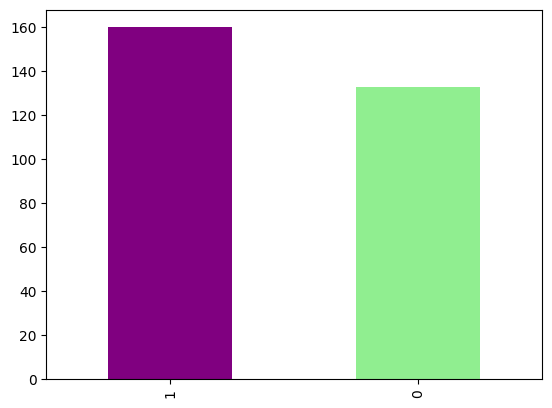

In [10]:
df.target.value_counts().plot(kind="bar", color=["purple", "lightgreen"]);




df.info() is used to see if there's any missing values and what type of data we're working with.

In our case, there are no missing values and all of our columns are numerical.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  293 non-null    int64  
 1   age         293 non-null    int64  
 2   sex         293 non-null    int64  
 3   cp          293 non-null    int64  
 4   trestbps    293 non-null    float64
 5   chol        293 non-null    float64
 6   fbs         293 non-null    int64  
 7   restecg     293 non-null    int64  
 8   thalach     293 non-null    float64
 9   exang       293 non-null    int64  
 10  oldpeak     293 non-null    float64
 11  slope       293 non-null    int64  
 12  ca          293 non-null    int64  
 13  thal        293 non-null    int64  
 14  target      293 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 36.6 KB


## Checking the Heart Disease Frequency according to Gender

Here, we're comparing two columns to each other by using the function pd.crosstab(column_1, column_2).

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Now, let's compare our target column with the sex column.

In our target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [12]:
df.sex.value_counts()

1    202
0     91
Name: sex, dtype: int64

There are 202 males and 97 females in our study.

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,23,110
1,68,92


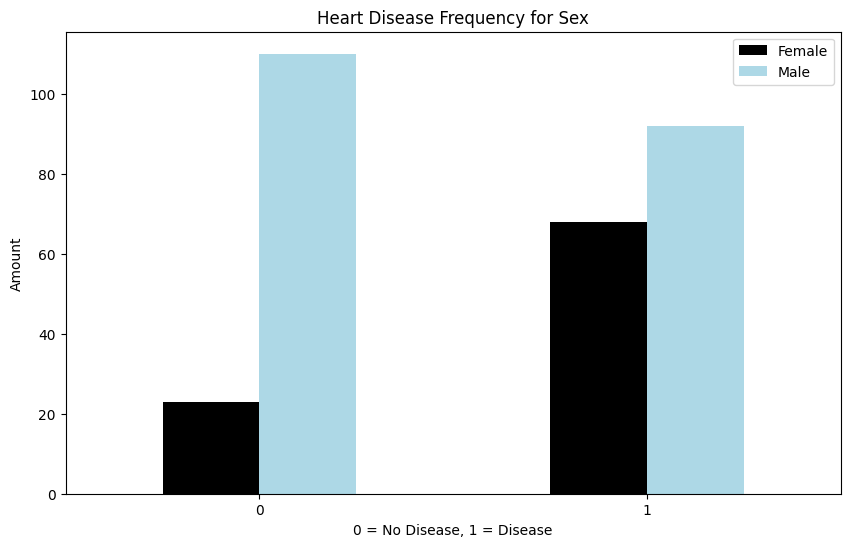

In [14]:
# Creating a plot with crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["black", "lightblue"]);

# Adding some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

What can we infer from this ?

we can infer, based on this, if the participant is a woman, there's a 68% chance she has heart disease and if its a male then he has 92% of having a heart disease.

Age vs Max Heart rate for Heart Disease

Here, I'm combining these two independent variables, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

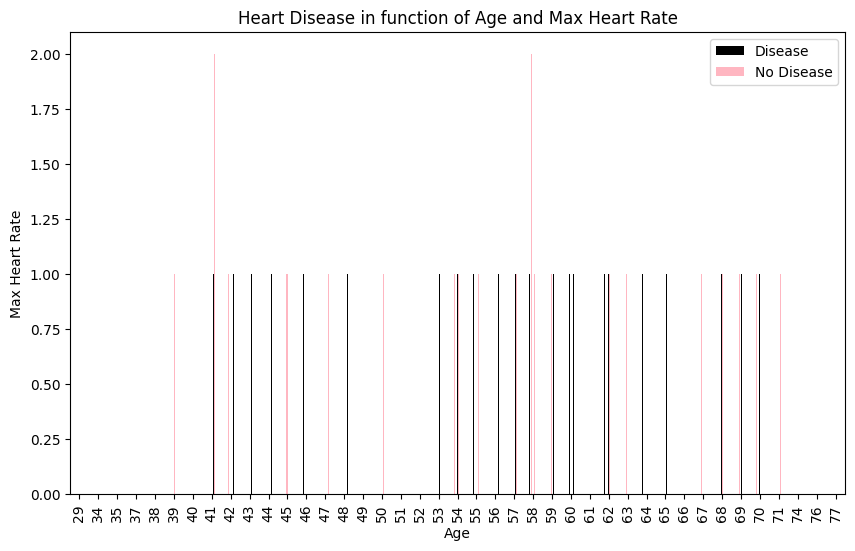

In [15]:
pd.crosstab(df.age, df.thalach).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["black", "lightpink"])
                                   
# Adding attributes to the plot to make it more readable
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Let's check the age distribution over the features

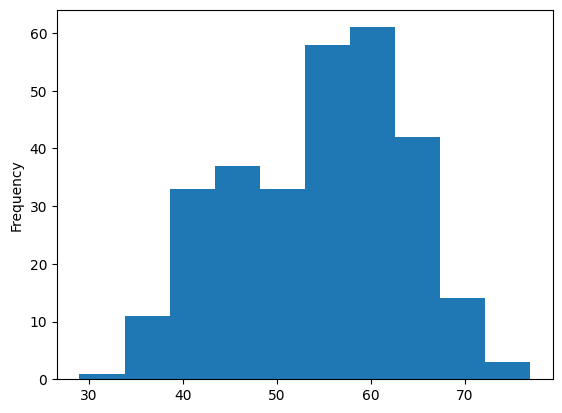

In [16]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

Heart Disease Frequency per Chest Pain Type

Here, I'm combining these two independent variables, chest pain type(cp) and target and then comparing them to our target variable heart disease.

In [17]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


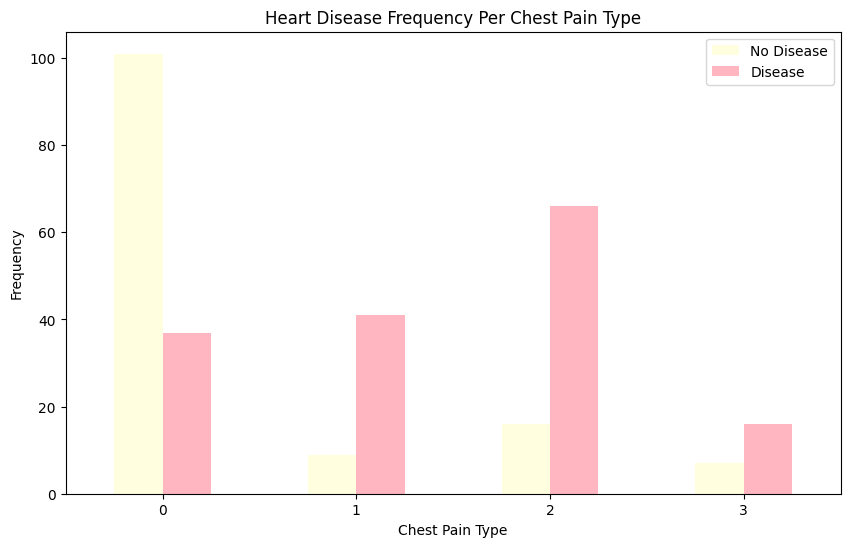

In [18]:
# Creating a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightyellow", "lightpink"])

# Adding attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

What can we infer from this?

As we can see from our dataset description, the different levels of chest pain are,

cp - chest pain type0: 

1 - Typical angina: chest pain related decrease blood supply to the heart1

2 - Atypical angina: chest pain not related to heart

3- Non-anginal pain: typically esophageal spasms (non heart related)

4 - Asymptomatic: chest pain not showing signs of disease

It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than the ones with no heart disease.

# Correlation between independent variables

Here, we'll compare all of the independent variables in one hit.

Using df.corr()  will create a correlation matrix, in other words.

In [19]:
# Finding the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Unnamed: 0,1.000000,0.179975,0.181503,-0.398856,0.098182,0.051948,-0.008088,-0.019919,-0.391267,0.378961,0.307510,-0.274223,0.380823,0.264371,-0.862056
age,0.179975,1.000000,-0.104863,-0.070586,0.276586,0.216155,0.127349,-0.119509,-0.396884,0.095919,0.211278,-0.167542,0.280493,0.067060,-0.215905
sex,0.181503,-0.104863,1.000000,-0.043666,-0.068282,-0.189984,0.028242,-0.053143,-0.045322,0.143038,0.099115,-0.027255,0.103767,0.219176,-0.271211
cp,-0.398856,-0.070586,-0.043666,1.000000,0.051210,-0.091003,0.097889,0.045198,0.302782,-0.391609,-0.153591,0.122779,-0.182492,-0.171826,0.441747
trestbps,0.098182,0.276586,-0.068282,0.051210,1.000000,0.135529,0.168406,-0.102731,-0.028102,0.072459,0.193254,-0.115657,0.096166,0.073411,-0.139090
chol,0.051948,0.216155,-0.189984,-0.091003,0.135529,1.000000,0.026193,-0.166307,-0.038738,0.071904,0.066434,-0.026953,0.089595,0.106809,-0.103311
fbs,-0.008088,0.127349,0.028242,0.097889,0.168406,0.026193,1.000000,-0.078938,0.001339,0.036164,0.009607,-0.060520,0.118146,-0.012527,-0.028695
restecg,-0.019919,-0.119509,-0.053143,0.045198,-0.102731,-0.166307,-0.078938,1.000000,0.038211,-0.073327,-0.051767,0.087550,-0.069496,-0.018690,0.143242
thalach,-0.391267,-0.396884,-0.045322,0.302782,-0.028102,-0.038738,0.001339,0.038211,1.000000,-0.395491,-0.347278,0.379258,-0.207472,-0.099342,0.411950
exang,0.378961,0.095919,0.143038,-0.391609,0.072459,0.071904,0.036164,-0.073327,-0.395491,1.000000,0.286938,-0.259066,0.121005,0.199949,-0.451127


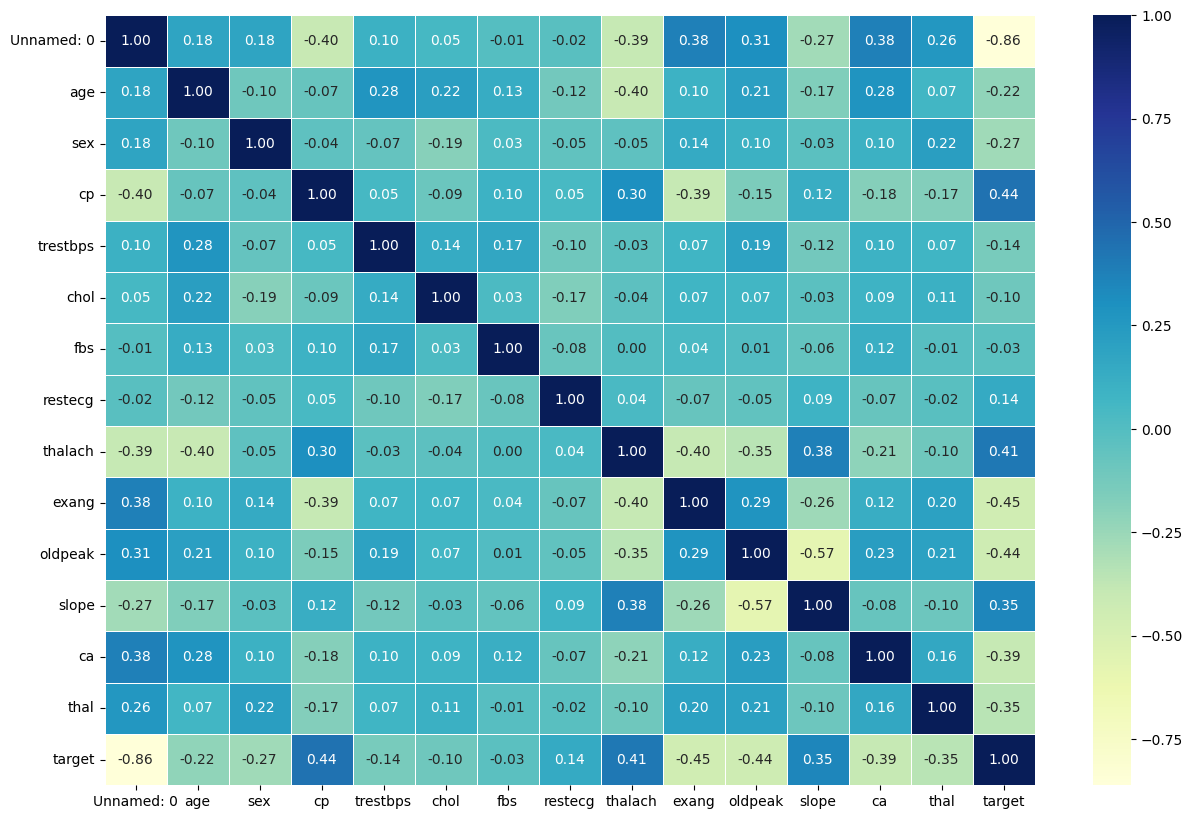

In [20]:
# Visualizing the correlation matrix with seaborn
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

 A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

# Modelling our data

Our problem statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Let's keep the evaluation metric whether we can reach 95% accuracy at predicting whether or not a patient has heart disease.

In [21]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


So as we're trying to predict our target variable using all of the other variables.

Splitting the target variable from the rest.

In [22]:
# droping everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [23]:
X.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1


In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

# Splitting our data into train and test

Dividing our data like, 80% to train on and the other 20% to test.

In [25]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [26]:
X_train.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2


In [27]:
y_train, len(y_train)


(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 234)

In [28]:
X_test.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,87,46,1,1,101.0,197.0,1,1,156.0,0,0.0,2,0,3
268,268,54,1,0,122.0,286.0,0,0,116.0,1,3.2,1,2,2
47,47,47,1,2,138.0,257.0,0,0,156.0,0,0.0,2,0,2
182,182,61,0,0,130.0,330.0,0,0,169.0,0,0.0,2,0,2
148,148,44,1,2,120.0,226.0,0,1,169.0,0,0.0,2,0,2


In [29]:
y_test, len(y_test)


(array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]),
 59)

And here there are 59 examples we'll test the models on

# Choosing the best model

Using the following and comparing their results.

Logistic Regression, K-Nearest Neighbors, RandomForest - RandomForestClassifier()

let's put them in a dictionary and which fits and scores them.

In [30]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 1.0, 'Logistic Regression': 0.9830508474576272, 'Random Forest': 1.0}

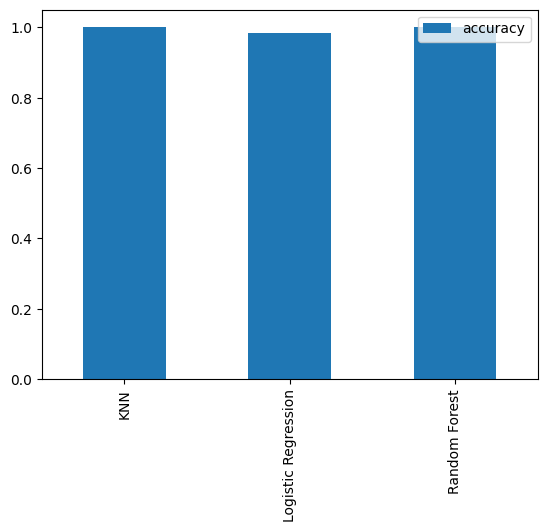

In [32]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

As we can see both KNN and Random Forest performs better

# Hyperparameter tuning and cross-validation

## Tuning KNeighborsClassifier (K-Nearest Neighbors or KNN) 

In [33]:
# Creating a list of train scores
train_scores = []

# Creating a list of test scores
test_scores = []

# Creating a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Seting up the algorithm
knn = KNeighborsClassifier()

# Looping through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fitting the algorithm
    knn.fit(X_train, y_train)
    
    # Updating the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Updating the test scores
    test_scores.append(knn.score(X_test, y_test))

In [34]:
train_scores

[1.0,
 0.9786324786324786,
 1.0,
 0.9871794871794872,
 0.9786324786324786,
 0.9871794871794872,
 0.9829059829059829,
 0.9829059829059829,
 0.9914529914529915,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9829059829059829,
 0.9871794871794872,
 0.9829059829059829,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872]

Maximum KNN score on the test data: 100.00%


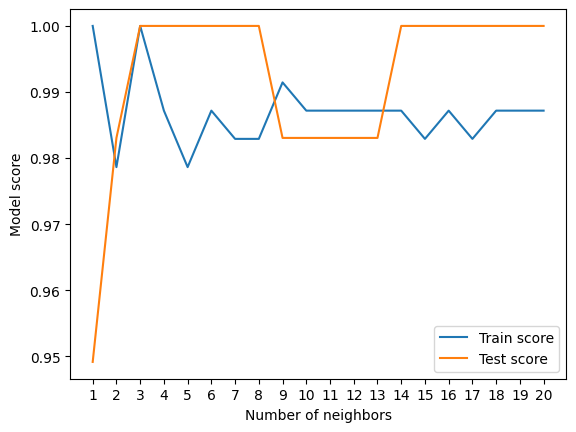

In [35]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Tuning models with with RandomizedSearchCV

In [36]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now using RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [37]:
# Setting up random seed
np.random.seed(42)

# Setting up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.615848211066026}

In [39]:
rs_log_reg.score(X_test, y_test)


0.9830508474576272

we'll do the same for RandomForestClassifier.

In [40]:
# Setting up random seed
np.random.seed(42)

# Setting up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fitting random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [41]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [42]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

1.0

## Tuning a model with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

In [43]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [45]:
# Evaluating the model
gs_log_reg.score(X_test, y_test)

0.9830508474576272

As we can see the GridSearchCV provides a better score without overfitting, it's because GridSearchCV sees every possible combination. So, in our case using GridsearchCV for our Hyperparameter tuning is a better idea.

# Evaluating a classification model

In [46]:
# Making preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

Looking at our actual data

In [48]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

### ROC Curve and AUC Scores

Here we're using ROC curve to find the false positive and false negative rates

We use them to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

To evaluate, we'll use the GridSearchCV version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


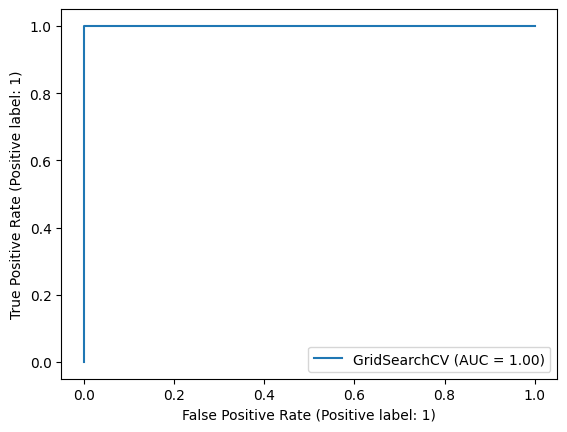

In [49]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

### Confusion matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [50]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  1]
 [ 0 34]]


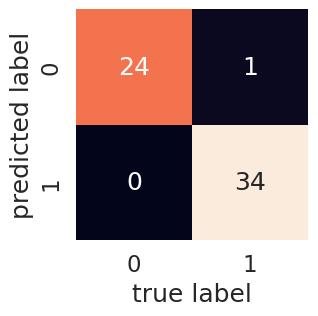

In [51]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

You can see the model gets confused (predicts the wrong label) relatively the same across true(1) classes. In essence, there are 1 occasaions where the model predicted 0 when it should've been 1 (false negative).

### Classification report

In [52]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.99        34

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.What we'll do to make them more solid is calculate them using cross-validation.

To do that, we'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameters.

In [53]:
# Checking with the best hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [54]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [55]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.86440678, 1.        , 1.        , 1.        , 0.68965517])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.910812390414962

Doing the same for other classification metrics.

In [57]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.96

In [58]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8875

In [59]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8995169082125603

Let's visualize them to understand better

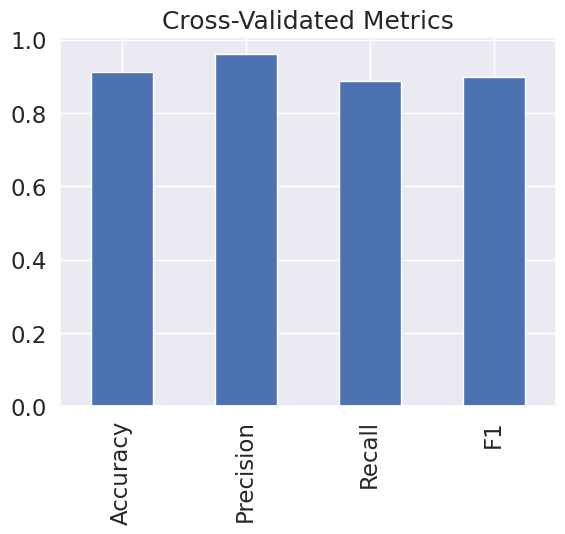

In [60]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

Now let's evaluate which feature contributes the most to predict the target variable.

To answer, "which features contributing most to the outcomes of the model?"

Means, while trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some other functions we've observed, the way each model identifies patterns in data varies slightly, and consequently, the criteria a model uses to determine the importance of these patterns also differs. This implies that each model utilizes a slightly distinct approach to identify the most significant features.

For this we can make use of LogisticRegression and can use the coef_ attribute

In [61]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.coef_

array([[-0.31154325,  0.21009377,  0.00352305,  0.25412838,  0.14933848,
        -0.01962692, -0.03678734,  0.31053597,  0.16363855, -0.02598069,
        -0.64835786,  0.30700602, -0.10729428,  0.00307998]])

In [63]:
# Matching features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Unnamed: 0': -0.3115432533362771,
 'age': 0.21009377253486763,
 'sex': 0.0035230521824738794,
 'cp': 0.2541283797287843,
 'trestbps': 0.14933847993025334,
 'chol': -0.019626916439885407,
 'fbs': -0.03678733515242917,
 'restecg': 0.31053596559214713,
 'thalach': 0.16363854609780376,
 'exang': -0.025980691155180372,
 'oldpeak': -0.6483578557796961,
 'slope': 0.30700602085364365,
 'ca': -0.10729428029238886,
 'thal': 0.003079983466756692}

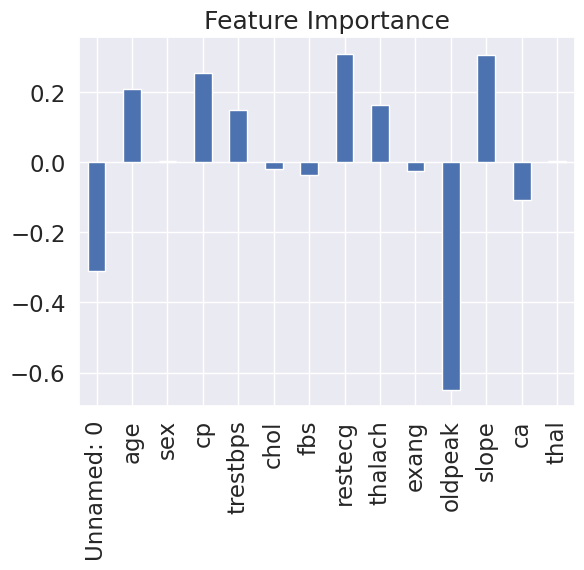

In [64]:
# Visualizing feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

As we can see some are negative and some are positive.The larger the value (bigger bar), the more the feature contributes to the models decision.If the value is negative, it means there's a negative correlation. And vice versa for positive values. Here, the slope has the highest positive correlation and the oldpeak has the highest negative correlation.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ade9dea5-8d00-484a-a9b5-d769156ac0c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>